# Flattening with a Savitzky-Golay filter

*gully*  
October 15, 2021

Often we want a mere quicklook of a flattened spectrum, and can't be bothered to mask the spectrum, or conduct other laborious pre-processing steps.  One way to achieve that goal is with the heuristic [Savitzky-Golay filter](https://en.wikipedia.org/wiki/Savitzky–Golay_filter) (often called "Savgol" for short), which acts as a high-pass filter-- removing any smooth trends to reveal just the sharp spectral lines.  

Here we demonstrate the how to apply`.flatten()` method, mirrored and abridged from the [lightkurve](http://docs.lightkurve.org) framework.  Behind-the-scenes the `lightkurve`-based `.flatten()` method applies the Savgol filter from `scipy`.  This method will usually require some tuning by human pattern recognition, since the underlying smoothness of the data depends on what spectra you have.

In [1]:
from muler.hpf import HPFSpectrum
%config InlineBackend.figure_format='retina'

In [2]:
path = 'https://github.com/OttoStruve/muler_example_data/raw/main/HPF/01_A0V_standards/'
filename = 'Goldilocks_20210801T083618_v1.0_0036.spectra.fits'
raw_spectrum = HPFSpectrum(file = path + filename, order=6)

In [3]:
spectrum = raw_spectrum.sky_subtract(method='vector').remove_nans().deblaze().normalize()

In [4]:
flattened_spectrum = spectrum.flatten()

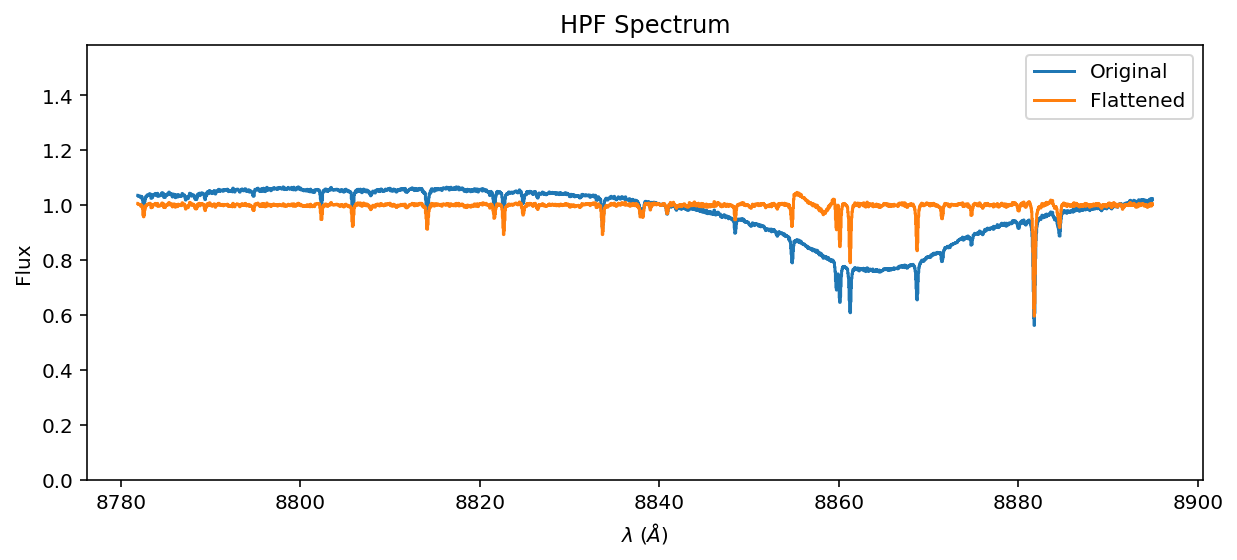

In [5]:
ax = spectrum.plot(label='Original');
flattened_spectrum.plot(ax=ax, label='Flattened');
ax.legend();

And voilà!  We have a coarsely flattened spectrum without all the effort of manually masking lines.  You can see an artifact at $\lambda = 8860\;Å$.  You can tune the flatten method with some of its keyword argments:

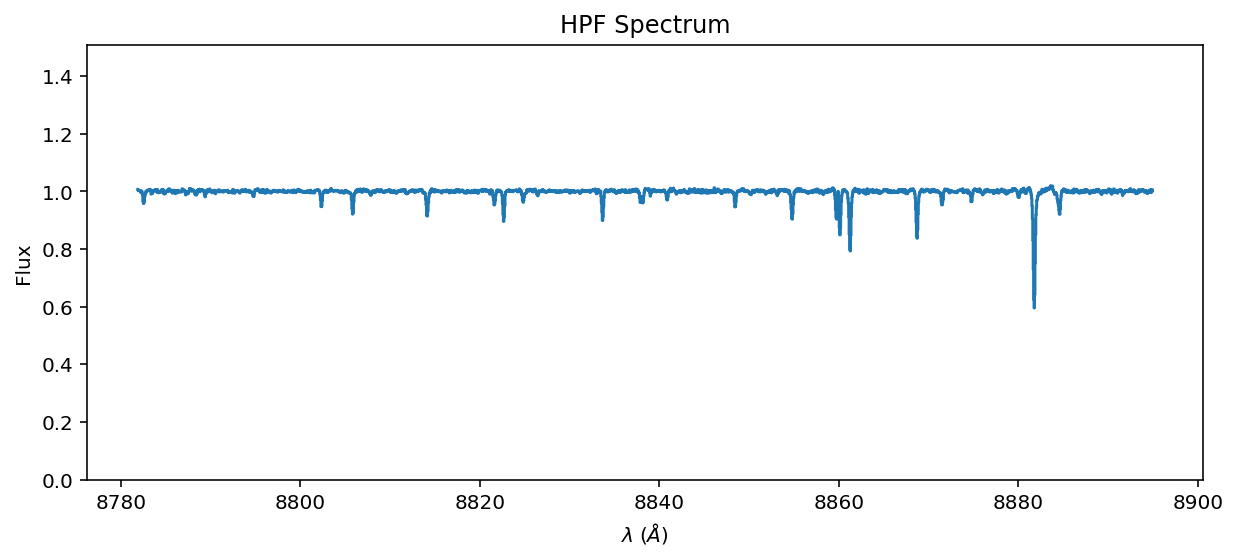

In [6]:
spectrum.flatten(window_length=61).plot();

That's better! :)  You can see some [ringing artifacts](https://en.wikipedia.org/wiki/Ringing_artifacts) near the window size of 61 pixels.  It's useful to inspect the trend by using the `return_trend=True` *kwarg*, which will return two spectra: the flattened spectrum and the fitted trend spectrum.

In [8]:
flattened_spectrum, trend = spectrum.flatten(window_length=81, niters=13, sigma=3.5,
                                             return_trend=True)

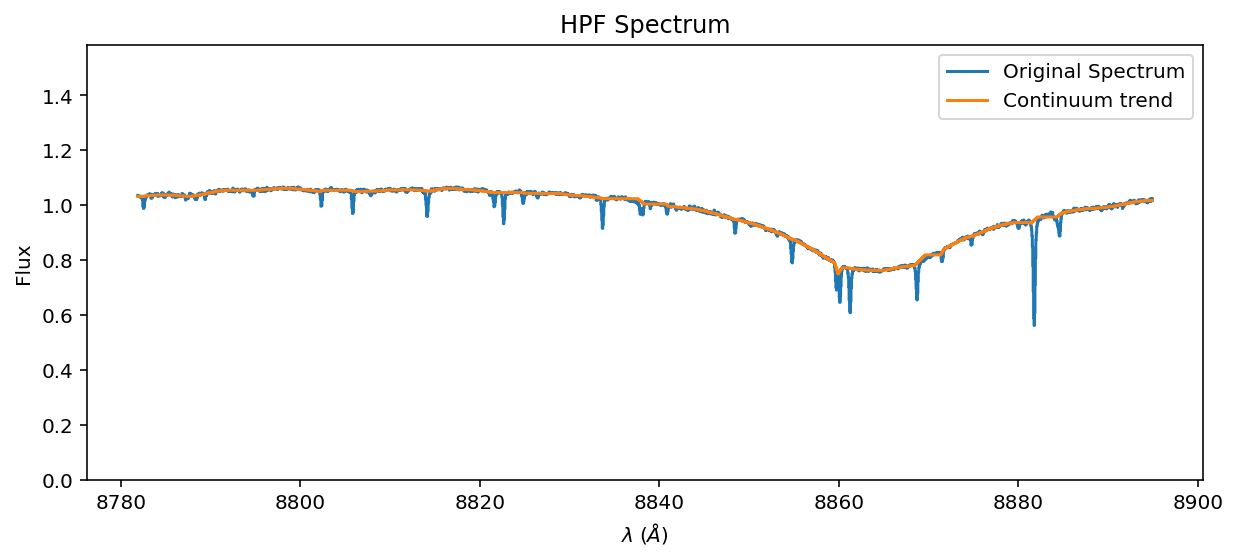

In [9]:
ax = spectrum.plot(label='Original Spectrum')
trend.plot(ax=ax, label='Continuum trend')
ax.legend();

You can see some signal self-substraction in the line at $\lambda =  8860\;Å$, and the continuum fit drives through weak lines near 8785 Å.  There's also a way to hand-in a `mask=` *kwarg* to preserve features you want to keep like telluric lines in this case.